In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from math import exp,log

In [2]:
def initialize_network_double(inputs,hidden1,hidden2,outputs):
    net = list()
    hidden_layer1 = [{'weights':[random() for i in range(inputs + 1)]} for i in range(hidden1)]
    net.append(hidden_layer1)
    
    hidden_layer2 = [{'weights':[random() for i in range(hidden1 + 1)]} for i in range(hidden2)]
    net.append(hidden_layer2)
    
    output_layer = [{'weights':[random() for i in range(hidden2 + 1)]} for i in range(outputs)]
    net.append(output_layer)
    return net

In [3]:
def initialize_network_single(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [4]:
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [5]:
# activation functions
def sigmoid(x):
    return 1.0 / (1.0 + exp(-x))

def tanh(x):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def transfer(x):
    return sigmoid(x)

In [6]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [7]:
def forward_propagate(network, row):
    inputs = row
    for layer in network:            
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [8]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [9]:
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [10]:
def train_network(network, train, lr, n_epochs, n_outputs, accuracy_score, loss_score):
    for epoch in range(n_epochs):
        sum_error = 0
        for i,row in enumerate(train):
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            # store accuracy and loss every 50 iterations
            if i%50 == 0:
                acc = calculate_accuracy(network,train)
                accuracy_score.append(acc)
                loss_score.append(sum_error)
                print(f'Iteration {i} | Accuracy: {acc} | Loss:{sum_error}')
            update_weights(network, row, lr)
        print('#'*50)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, lr, sum_error))
        print('#'*50)

In [11]:
# def accuracy_metric(actual, predicted):
#     correct = 0
#     for i in range(len(actual)):
#         if actual[i] == predicted[i]:
#             correct += 1
#     return correct / float(len(actual)) * 100.0

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
pathdir = '/content/drive/MyDrive/##### ONLINE Classes SEM 3-2/Machine Learning/MLAssignment2/dataset_NN.csv'
df = pd.read_csv(pathdir)

In [14]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats

    # Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [15]:
df = df.values
minmax = dataset_minmax(df)
normalize_dataset(df, minmax)

In [16]:
def split_train_test(data, split, seed):

    #creating the training and testing dataset
    rows = int(data.shape[0] * split)
    indices = np.arange(data.shape[0])
    
    np.random.seed(seed)
    np.random.shuffle(indices)
    
    train = data[indices[:rows]]
    test = data[indices[rows:]]

    return train,test

In [17]:
train, test = split_train_test(df, 0.7, 23)

In [18]:
print(train)
print(len(train))
print(len(test))

[[ 0.          0.33333333  0.         ...  0.56914545  0.4965783
  10.        ]
 [ 0.          0.5         0.2        ...  0.3884311   0.36209795
   5.        ]
 [ 0.          0.5         0.2        ...  0.50324073  0.67034833
   6.        ]
 ...
 [ 0.          0.5         0.2        ...  0.56304156  0.68562956
   6.        ]
 [ 0.5         0.16666667  0.2        ...  0.23035431  0.17132389
   7.        ]
 [ 0.          0.33333333  0.         ...  0.68549271  0.62199407
   3.        ]]
1400
600


In [19]:
train = train.tolist()
test = test.tolist()
print(train)

[[0.0, 0.3333333333333333, 0.0, 0.5938012263979114, 0.5691454454889607, 0.496578300994987, 10.0], [0.0, 0.5, 0.2, 0.4042559650294457, 0.38843109906263373, 0.36209795456640775, 5.0], [0.0, 0.5, 0.2, 0.6699350373383524, 0.5032407338961983, 0.6703483329938266, 6.0], [0.0, 0.3333333333333333, 0.0, 0.6698743245704571, 0.5821565268880988, 0.5494421769792431, 3.0], [0.0, 0.5, 0.2, 0.7108023192277336, 0.5483339510374444, 0.7211043711532072, 6.0], [0.0, 0.5, 0.2, 0.627132535972315, 0.5575287632214069, 0.5513933082730226, 4.0], [0.0, 0.5, 0.2, 0.27439135450185176, 0.11327479628284655, 0.11174721223438497, 2.0], [0.0, 0.5, 0.2, 0.49620545200655686, 0.47051640673518985, 0.39647110754309006, 5.0], [0.0, 0.3333333333333333, 0.0, 0.41178434824843657, 0.28128736426170253, 0.32252554946908435, 5.0], [0.5, 0.16666666666666666, 0.2, 0.26259789933823086, 0.172911220933704, 0.10652900117175026, 10.0], [0.0, 0.3333333333333333, 0.0, 0.3784530386740331, 0.32321587000189356, 0.22188520749037927, 8.0], [0.0, 0

In [20]:
for i in train:
    i[-1] = int(i[-1]-1)
for i in test:
    i[-1] = int(i[-1]-1)

In [21]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def predict(network, row):
    outputs = forward_propagate(network, row)
    outputs = softmax(outputs)
    return np.argmax(outputs,axis = 0)

In [22]:
def calculate_accuracy(network,data):
    pred = list()
    actual = list()
    for row in data:
        actual.append(row[-1])
        pred.append(predict(network,row))
    accuracy = accuracy_metric(actual,pred)
    return accuracy

## 1 Hidden Layers (6-8-10)

### lr=0.3

In [23]:
net = initialize_network_single(6,8,10)
accuracy_score = []
loss_score = []

In [24]:
train_network(net,train,lr = 0.3,
              n_epochs=500,n_outputs = 10,
              accuracy_score = accuracy_score,
              loss_score = loss_score)

Streaming output truncated to the last 5000 lines.
Iteration 1100 | Accuracy: 75.07142857142857 | Loss:372.0331098374921
Iteration 1150 | Accuracy: 73.07142857142857 | Loss:384.73546389630417
Iteration 1200 | Accuracy: 73.78571428571429 | Loss:404.5591984866477
Iteration 1250 | Accuracy: 74.14285714285714 | Loss:416.91801512860826
Iteration 1300 | Accuracy: 74.92857142857143 | Loss:428.47258265919686
Iteration 1350 | Accuracy: 76.14285714285714 | Loss:444.6445929349989
##################################################
>epoch=338, lrate=0.300, error=459.777
##################################################
Iteration 0 | Accuracy: 75.5 | Loss:1.743640404091238
Iteration 50 | Accuracy: 76.5 | Loss:16.900810598505146
Iteration 100 | Accuracy: 76.14285714285714 | Loss:39.90238548676939
Iteration 150 | Accuracy: 74.78571428571429 | Loss:57.88903428568095
Iteration 200 | Accuracy: 74.42857142857143 | Loss:69.95292400331029
Iteration 250 | Accuracy: 76.28571428571429 | Loss:86.64101733107803

In [25]:
for layer in net:
    print(layer)

[{'weights': [-6.078553109080566, 2.4934096799347754, 3.807194287620623, 21.66199467578668, 10.274447808550104, -21.307413331874436, -9.819169129403278], 'output': 0.884998972585034, 'delta': -0.0007396889076164534}, {'weights': [11.84494427926206, 2.074320927486859, 10.8132249058571, -6.533845391731627, -11.36626787103271, 25.726275155280746, -4.896549214262629], 'output': 0.2324431563566603, 'delta': 8.714850982685043e-05}, {'weights': [5.7647528503597485, -1.9761247855597883, 2.992248822582852, -0.793268749399849, -17.30145182056697, 10.699120568278216, 5.329531382428484], 'output': 0.23757817116237495, 'delta': 0.00042476507324922723}, {'weights': [-5.17592206891633, 5.871406765819814, 1.2656194736807977, -0.756074289557698, 4.432380207396611, 8.217008565149914, -0.04327115598403503], 'output': 0.9999222156120263, 'delta': 5.654000482292983e-07}, {'weights': [3.2226109817393764, 3.1692610516011945, 10.873034558060404, -5.277485292209415, 14.559146012648618, -21.72514357475252, 3.88

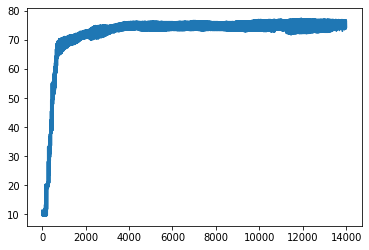

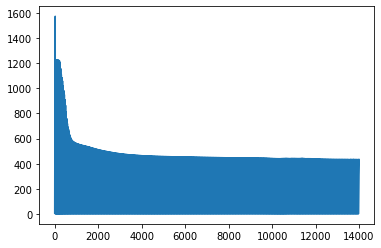

In [26]:
dir = '/content/drive/MyDrive/##### ONLINE Classes SEM 3-2/Machine Learning/MLAssignment2/'
import matplotlib.pyplot as plt
plt.plot(accuracy_score)
plt.savefig(pathdir+'acc-iter-h1-0.3.png')
plt.show()

plt.plot(loss_score)
plt.savefig(pathdir+'loss-iter-h1-0.3.png')
plt.show()

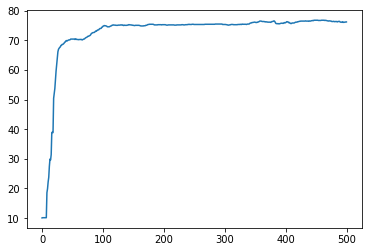

In [27]:
# plt.plot(accuracy_score)
plt.plot(accuracy_score[::28])
plt.savefig(pathdir+'acc-epoch-h1-0.3.png')
plt.show()

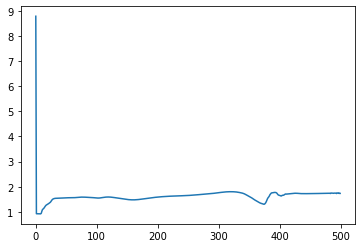

In [28]:
# plt.plot(loss_score)
plt.plot(loss_score[::28])
plt.savefig(pathdir+'loss-epoch-h1-0.3.png')
plt.show()

In [29]:
train_acc = calculate_accuracy(net,train)
print(f'Training Accuracy: {train_acc}')

Training Accuracy: 76.07142857142857


In [30]:
test_acc = calculate_accuracy(net,test)
print(f'Test Accuracy: {test_acc}')

Test Accuracy: 73.0


### lr=0.1

In [31]:
net = initialize_network_single(6,8,10)
accuracy_score = []
loss_score = []

In [32]:
train_network(net,train,0.1,500,10,accuracy_score,loss_score)

Iteration 0 | Accuracy: 10.142857142857142 | Loss:8.645193140234495
Iteration 50 | Accuracy: 10.142857142857142 | Loss:414.5060201608964
Iteration 100 | Accuracy: 10.142857142857142 | Loss:667.9569578231936
Iteration 150 | Accuracy: 10.142857142857142 | Loss:812.7396812835261
Iteration 200 | Accuracy: 10.142857142857142 | Loss:925.193916639066
Iteration 250 | Accuracy: 10.142857142857142 | Loss:1037.857784409908
Iteration 300 | Accuracy: 10.142857142857142 | Loss:1128.4680876987711
Iteration 350 | Accuracy: 10.142857142857142 | Loss:1177.7350006741965
Iteration 400 | Accuracy: 9.642857142857144 | Loss:1223.4707456878712
Iteration 450 | Accuracy: 10.428571428571429 | Loss:1268.566722520112
Iteration 500 | Accuracy: 10.428571428571429 | Loss:1313.8086177043042
Iteration 550 | Accuracy: 10.5 | Loss:1358.8864528733536
Iteration 600 | Accuracy: 9.714285714285714 | Loss:1404.1110931030432
Iteration 650 | Accuracy: 10.428571428571429 | Loss:1449.410367150181
Iteration 700 | Accuracy: 10.42857

KeyboardInterrupt: ignored

In [ ]:
for layer in net:
    print(layer)

In [ ]:
dir = '/content/drive/MyDrive/##### ONLINE Classes SEM 3-2/Machine Learning/MLAssignment2/'
import matplotlib.pyplot as plt
plt.plot(accuracy_score)
plt.savefig(pathdir+'acc-iter-h1-0.1-68810.png')
plt.show()

plt.plot(loss_score)
plt.savefig(pathdir+'loss-iter-h1-0.1-68810.png')
plt.show()

In [ ]:
# plt.plot(accuracy_score)
plt.plot(accuracy_score[::28])
plt.savefig(pathdir+'acc-epoch-h1-0.1-68810.png')
plt.show()

In [ ]:
# plt.plot(loss_score)
plt.plot(loss_score[::28])
plt.savefig(pathdir+'loss-epoch-h1-0.1-68810.png')
plt.show()

In [ ]:
train_acc = calculate_accuracy(net,train)
print(f'Training Accuracy: {train_acc}')

In [ ]:
test_acc = calculate_accuracy(net,test)
print(f'Test Accuracy: {test_acc}')

### lr=0.05

In [ ]:
net = initialize_network_single(6,8,10)
accuracy_score = []
loss_score = []

In [ ]:
train_network(net,train,lr = 0.05,n_epochs=500,n_outputs=10,accuracy_score,loss_score)

In [ ]:
for layer in net:
    print(layer)

In [ ]:
dir = '/content/drive/MyDrive/##### ONLINE Classes SEM 3-2/Machine Learning/MLAssignment2/'
import matplotlib.pyplot as plt
plt.plot(accuracy_score)
plt.savefig(pathdir+'acc-iter-h1-0.05.png')
plt.show()

plt.plot(loss_score)
plt.savefig(pathdir+'loss-iter-h1-0.05.png')
plt.show()

In [ ]:
# plt.plot(accuracy_score)
plt.plot(accuracy_score[::28])
plt.savefig(pathdir+'acc-epoch-h1-0.05.png')
plt.show()

plt.plot(loss_score[::28])
plt.savefig(pathdir+'loss-epoch-h1-0.3.png')
plt.show()

In [ ]:
train_acc = calculate_accuracy(net,train)
print(f'Training Accuracy: {train_acc}')

In [ ]:
test_acc = calculate_accuracy(net,test)
print(f'Test Accuracy: {test_acc}')

### 2 Hidden Layer (6-8-8-10)

### lr=0.3

In [ ]:
net = initialize_network_double(6,8,8,10)
accuracy_score = []
loss_score = []

In [ ]:
train_network(net,train,lr = 0.3,
              n_epochs=500,n_outputs = 10,
              accuracy_score = accuracy_score,
              loss_score = loss_score)

Streaming output truncated to the last 5000 lines.
Iteration 1100 | Accuracy: 75.07142857142857 | Loss:372.0331098374921
Iteration 1150 | Accuracy: 73.07142857142857 | Loss:384.73546389630417
Iteration 1200 | Accuracy: 73.78571428571429 | Loss:404.5591984866477
Iteration 1250 | Accuracy: 74.14285714285714 | Loss:416.91801512860826
Iteration 1300 | Accuracy: 74.92857142857143 | Loss:428.47258265919686
Iteration 1350 | Accuracy: 76.14285714285714 | Loss:444.6445929349989
##################################################
>epoch=338, lrate=0.300, error=459.777
##################################################
Iteration 0 | Accuracy: 75.5 | Loss:1.743640404091238
Iteration 50 | Accuracy: 76.5 | Loss:16.900810598505146
Iteration 100 | Accuracy: 76.14285714285714 | Loss:39.90238548676939
Iteration 150 | Accuracy: 74.78571428571429 | Loss:57.88903428568095
Iteration 200 | Accuracy: 74.42857142857143 | Loss:69.95292400331029
Iteration 250 | Accuracy: 76.28571428571429 | Loss:86.64101733107803

In [ ]:
for layer in net:
    print(layer)

[{'weights': [-6.078553109080566, 2.4934096799347754, 3.807194287620623, 21.66199467578668, 10.274447808550104, -21.307413331874436, -9.819169129403278], 'output': 0.884998972585034, 'delta': -0.0007396889076164534}, {'weights': [11.84494427926206, 2.074320927486859, 10.8132249058571, -6.533845391731627, -11.36626787103271, 25.726275155280746, -4.896549214262629], 'output': 0.2324431563566603, 'delta': 8.714850982685043e-05}, {'weights': [5.7647528503597485, -1.9761247855597883, 2.992248822582852, -0.793268749399849, -17.30145182056697, 10.699120568278216, 5.329531382428484], 'output': 0.23757817116237495, 'delta': 0.00042476507324922723}, {'weights': [-5.17592206891633, 5.871406765819814, 1.2656194736807977, -0.756074289557698, 4.432380207396611, 8.217008565149914, -0.04327115598403503], 'output': 0.9999222156120263, 'delta': 5.654000482292983e-07}, {'weights': [3.2226109817393764, 3.1692610516011945, 10.873034558060404, -5.277485292209415, 14.559146012648618, -21.72514357475252, 3.88

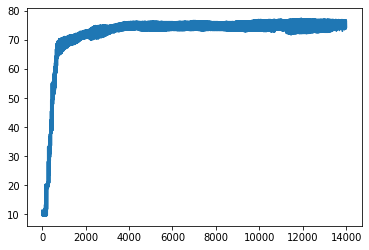

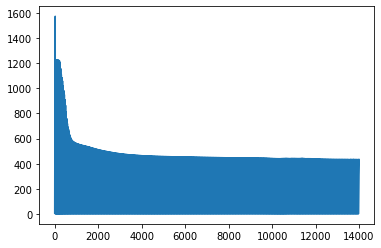

In [ ]:
dir = '/content/drive/MyDrive/##### ONLINE Classes SEM 3-2/Machine Learning/MLAssignment2/'
import matplotlib.pyplot as plt
plt.plot(accuracy_score)
plt.savefig(pathdir+'acc-iter-h2-0.3.png')
plt.show()

plt.plot(loss_score)
plt.savefig(pathdir+'loss-iter-h2-0.3.png')
plt.show()

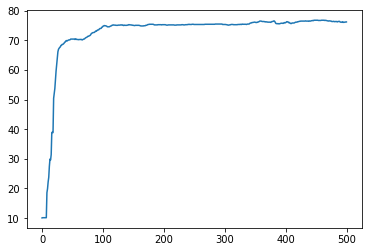

In [ ]:
# plt.plot(accuracy_score)
plt.plot(accuracy_score[::28])
plt.savefig(pathdir+'acc-epoch-h2-0.3.png')
plt.show()

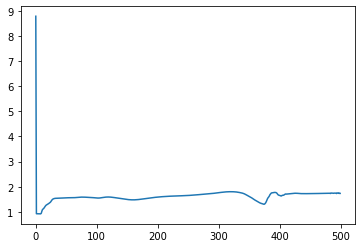

In [ ]:
# plt.plot(loss_score)
plt.plot(loss_score[::28])
plt.savefig(pathdir+'loss-epoch-h2-0.3.png')
plt.show()

In [ ]:
train_acc = calculate_accuracy(net,train)
print(f'Training Accuracy: {train_acc}')

Training Accuracy: 76.07142857142857


In [ ]:
test_acc = calculate_accuracy(net,test)
print(f'Test Accuracy: {test_acc}')

Test Accuracy: 73.0


### lr=0.1

In [ ]:
net = initialize_network_double(6,8,8,10)
accuracy_score = []
loss_score = []

In [ ]:
train_network(net,train,0.1,500,10,accuracy_score,loss_score)

Iteration 0 | Accuracy: 10.142857142857142 | Loss:8.645193140234495
Iteration 50 | Accuracy: 10.142857142857142 | Loss:414.5060201608964
Iteration 100 | Accuracy: 10.142857142857142 | Loss:667.9569578231936
Iteration 150 | Accuracy: 10.142857142857142 | Loss:812.7396812835261
Iteration 200 | Accuracy: 10.142857142857142 | Loss:925.193916639066
Iteration 250 | Accuracy: 10.142857142857142 | Loss:1037.857784409908
Iteration 300 | Accuracy: 10.142857142857142 | Loss:1128.4680876987711
Iteration 350 | Accuracy: 10.142857142857142 | Loss:1177.7350006741965
Iteration 400 | Accuracy: 9.642857142857144 | Loss:1223.4707456878712
Iteration 450 | Accuracy: 10.428571428571429 | Loss:1268.566722520112
Iteration 500 | Accuracy: 10.428571428571429 | Loss:1313.8086177043042
Iteration 550 | Accuracy: 10.5 | Loss:1358.8864528733536
Iteration 600 | Accuracy: 9.714285714285714 | Loss:1404.1110931030432
Iteration 650 | Accuracy: 10.428571428571429 | Loss:1449.410367150181
Iteration 700 | Accuracy: 10.42857

KeyboardInterrupt: ignored

In [ ]:
for layer in net:
    print(layer)

In [ ]:
dir = '/content/drive/MyDrive/##### ONLINE Classes SEM 3-2/Machine Learning/MLAssignment2/'
import matplotlib.pyplot as plt
plt.plot(accuracy_score)
plt.savefig(pathdir+'acc-iter-h2-0.1-68810.png')
plt.show()

plt.plot(loss_score)
plt.savefig(pathdir+'loss-iter-h2-0.1-68810.png')
plt.show()

In [ ]:
# plt.plot(accuracy_score)
plt.plot(accuracy_score[::28])
plt.savefig(pathdir+'acc-epoch-h2-0.1-68810.png')
plt.show()

In [ ]:
# plt.plot(loss_score)
plt.plot(loss_score[::28])
plt.savefig(pathdir+'loss-epoch-h2-0.1-68810.png')
plt.show()

In [ ]:
train_acc = calculate_accuracy(net,train)
print(f'Training Accuracy: {train_acc}')

In [ ]:
test_acc = calculate_accuracy(net,test)
print(f'Test Accuracy: {test_acc}')

### lr=0.05

In [ ]:
net = initialize_network_double(6,8,8,10)
accuracy_score = []
loss_score = []

In [ ]:
train_network(net,train,lr = 0.05,n_epochs=500,n_outputs=10,accuracy_score,loss_score)

In [ ]:
for layer in net:
    print(layer)

In [ ]:
dir = '/content/drive/MyDrive/##### ONLINE Classes SEM 3-2/Machine Learning/MLAssignment2/'
import matplotlib.pyplot as plt
plt.plot(accuracy_score)
plt.savefig(pathdir+'acc-iter-h2-0.05.png')
plt.show()

plt.plot(loss_score)
plt.savefig(pathdir+'loss-iter-h2-0.05.png')
plt.show()

In [ ]:
# plt.plot(accuracy_score)
plt.plot(accuracy_score[::28])
plt.savefig(pathdir+'acc-epoch-h2-0.05.png')
plt.show()

plt.plot(loss_score[::28])
plt.savefig(pathdir+'loss-epoch-h2-0.3.png')
plt.show()

In [ ]:
train_acc = calculate_accuracy(net,train)
print(f'Training Accuracy: {train_acc}')

In [ ]:
test_acc = calculate_accuracy(net,test)
print(f'Test Accuracy: {test_acc}')